In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import transform

In [5]:
from keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


57344/57026 [==============================] - 0s 5us/step


### Данные:
Будем работать с датасетом [Boston Housing Prices](https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef).

Text(0.5,0,'Price')

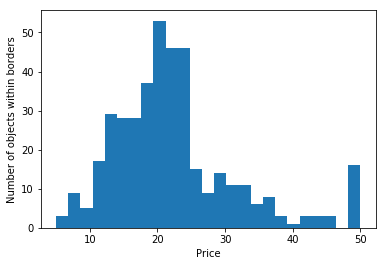

In [6]:
plt.hist(y_train, bins=25)
plt.ylabel('Number of objects within borders')
plt.xlabel('Price')

### Задание.
Будем решать задачу регрессии. Целевая переменная -- цена дома, признаки - различная информация о домохозяйстве. Для решения будем использовать линейную регрессию. Ваша задача - оценить качество решения в зависимости от количества объектов в обучающей выборке. Качество решения будем оценивать с помощью среднеквадратичной и среднеабсолютной ошибки, а так же [коэффициента детерминации $r^2$](http://scikit-learn.org/stable/modules/model_evaluation.html#r2-score-the-coefficient-of-determination). Также требуется оценить дисперсию данных функционалов в зависимости от числа объектов в обучающей выборке. 

*Обращаем ваше внимание, что для качественной оценки данных зависимостей эксперименты для каждого размера выборки стоит повторять многократно на различных случайных подвыборках.*

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Text(0.5,1,'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

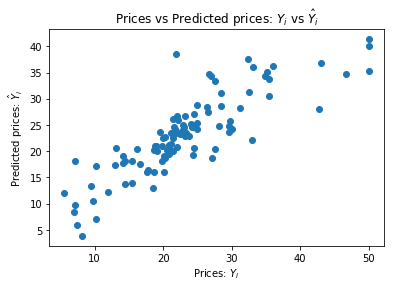

In [17]:
lm = LinearRegression()
lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [18]:
print('mae = {}'.format(mean_absolute_error(y_test, y_pred)))
print('mse = {}'.format(mean_squared_error(y_test, y_pred)))
print('prediction variance = {}'.format(np.std((y_test - y_pred)**2)))

mae = 3.464185812406724
mse = 23.195599256422998
prediction variance = 45.78048685033721


In [21]:
samples_amount = len(X_train)
rep_amount = 100

mae = np.zeros(samples_amount)
mse = np.zeros(samples_amount)
r2 = np.zeros(samples_amount)

In [25]:
for i in range(1, samples_amount):
    for j in range(rep_amount):
        sub_data = np.random.choice(np.arange(len(X_train)), i + 1, replace = False)
        sub_x = X_train[sub_data]
        sub_y = y_train[sub_data]
        lm.fit(sub_x, sub_y)
        y_pred = lm.predict(X_test)
        mae[i] += mean_absolute_error(y_test, y_pred)
        mse[i] += mean_squared_error(y_test, y_pred)
        r2[i] += r2_score(y_test, y_pred)
    mae[i] = mae[i] / rep_amount
    mse[i] = mse[i] / rep_amount
    r2[i] = r2[i] / rep_amount

In [37]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'FreeSerif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 18

Text(0.5,1,'mae(N)')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


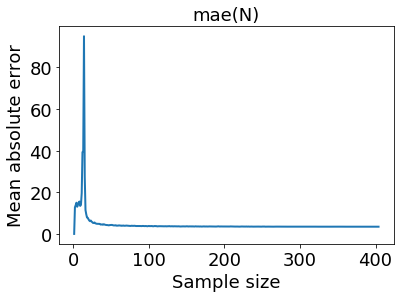

In [38]:
x = np.arange(1, len(X_train) + 1)
plt.plot(x, mae)
plt.ylabel('Mean absolute error')
plt.xlabel('Sample size')
plt.title('mae(N)')

Text(0.5,1,'mse(N)')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


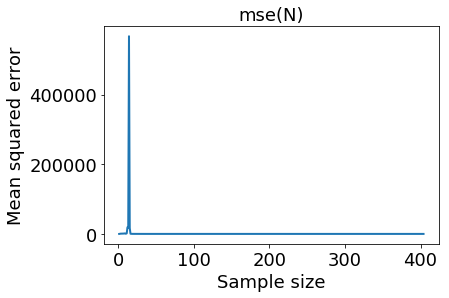

In [40]:
plt.plot(x, mse)
plt.ylabel('Mean squared error')
plt.xlabel('Sample size')
plt.title('mse(N)')

Text(0.5,1,'R2(N)')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


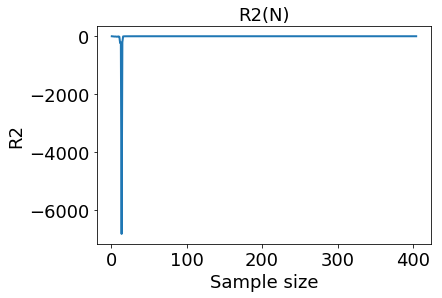

In [41]:
plt.plot(x, r2)
plt.ylabel('R2')
plt.xlabel('Sample size')
plt.title('R2(N)')

In [ ]:
# # Plot code example from ODS Open Machine Course notebook from lesson 9
# # Source: https://github.com/Yorko/mlcourse_open/blob/master/jupyter_russian/topic09_time_series/topic9_part1_time_series_python.ipynb
#     plt.figure(figsize=(15, 5))
#     plt.plot(prediction_test, label="prediction")
#     plt.plot(lower, "r--", label="upper bond / lower bond")
#     plt.plot(upper, "r--")
#     plt.plot(list(y_test), label="y_test")
#     plt.plot(Anomalies, "ro", markersize=10)
#     plt.legend(loc="best")
#     plt.axis('tight')
#     plt.title("XGBoost Mean absolute error {} users".format(round(mean_absolute_error(prediction_test, y_test))))
#     plt.grid(True)
#     plt.legend()

In [ ]:
### Your code here